### Importacion de librerias 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Extraer datos

In [129]:
df = pd.read_csv("../data/clean_dataset.csv")
df

,Freedom,Generosity,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year,Region,Economic_Health_Index
0,0.66557,0.29678,0.41978,1.39651,0.94143,7.587,1.34951,2015,Western Europe,1.772106
1,0.62877,0.43630,0.14145,1.30232,0.94784,7.561,1.40223,2015,Western Europe,1.626761
2,0.64938,0.34139,0.48357,1.32548,0.87464,7.527,1.36058,2015,Western Europe,1.458406
3,0.66973,0.34699,0.36503,1.45900,0.88521,7.522,1.33095,2015,Western Europe,1.720453
4,0.63297,0.45811,0.32957,1.32629,0.90563,7.427,1.32261,2015,North America,1.548120
...,...,...,...,...,...,...,...,...,...,...
777,0.55500,0.21700,0.41100,0.35900,0.61400,3.334,0.71100,2019,Sub-Saharan Africa,-0.963090
778,0.41700,0.27600,0.14700,0.47600,0.49900,3.231,0.88500,2019,Sub-Saharan Africa,-1.087552
779,0.00000,0.15800,0.02500,0.35000,0.36100,3.203,0.51700,2019,Southern Asia,-1.699650
780,0.22500,0.23500,0.03500,0.02600,0.10500,3.083,0.00000,2019,Sub-Saharan Africa,-2.991922


In [138]:
df = df.drop(columns=[ 'Economic_Health_Index'])

In [130]:
def creating_dummy_variables(df):
    df = pd.get_dummies(df, columns=["Region"])
    return df
df = creating_dummy_variables(df)

In [150]:
boolean_cols = df.select_dtypes(include='bool').columns.tolist()

# Convertirlas a enteros (0 y 1)
df[boolean_cols] = df[boolean_cols].astype(int)

print("Booleanas codificadas a enteros (1/0):", boolean_cols)

Booleanas codificadas a enteros (1/0): ['Region_Australia and New Zealand', 'Region_Central and Eastern Europe', 'Region_Eastern Asia', 'Region_Latin America and Caribbean', 'Region_Middle East and Northern Africa', 'Region_North America', 'Region_Southeastern Asia', 'Region_Southern Asia', 'Region_Sub-Saharan Africa', 'Region_Western Europe']


### Entrenamiento de los modelos

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Freedom                                 782 non-null    float64
 1   Generosity                              782 non-null    float64
 2   Perceptions_of_corruption               782 non-null    float64
 3   GDP_per_capita                          782 non-null    float64
 4   Healthy_life_expectancy                 782 non-null    float64
 5   Happiness_Score                         782 non-null    float64
 6   Social_support                          782 non-null    float64
 7   Year                                    782 non-null    int64  
 8   Region_Australia and New Zealand        782 non-null    int64  
 9   Region_Central and Eastern Europe       782 non-null    int64  
 10  Region_Eastern Asia                     782 non-null    int64 

In [152]:
X = df.drop(["Happiness_Score"], axis = 1)
y = df["Happiness_Score"]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (547, 17)
Test data shape:  (235, 17)


In [154]:
X_test.columns

Index(['Freedom', 'Generosity', 'Perceptions_of_corruption', 'GDP_per_capita',
       'Healthy_life_expectancy', 'Social_support', 'Year',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

In [155]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lf = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lf)
r2_lr = r2_score(y_test, y_pred_lf)

print("Mean Squared Error for Linear Regression: ", mse_lr)
print("R2 Score for Linear Regression: ", r2_lr)

Mean Squared Error for Linear Regression:  0.21775935575419614
R2 Score for Linear Regression:  0.8278459573653836


In [163]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=200)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error for Random Forest: ", mse_rf)
print("R2 Score for Random Forest: ", r2_rf)

Mean Squared Error for Random Forest:  0.16252103051678704
R2 Score for Random Forest:  0.871515727442771


In [157]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error for Gradient Boosting: ", mse_gb)
print("R2 Score for Gradient Boosting: ", r2_gb)

Mean Squared Error for Gradient Boosting:  0.17616564961734818
R2 Score for Gradient Boosting:  0.860728699118612


In [158]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Mean Squared Error for Ridge Regression: ", mse_ridge)
print("R2 Score for Ridge Regression: ", r2_ridge)


Mean Squared Error for Ridge Regression:  0.21953675557004176
R2 Score for Ridge Regression:  0.8264407981582576


In [159]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error for XGBoost: ", mse_xgb)
print("R2 Score for XGBoost: ", r2_xgb)


Mean Squared Error for XGBoost:  0.18284263024155054
R2 Score for XGBoost:  0.8554500776648135


In [160]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
cb_model = CatBoostRegressor(verbose=0, random_state=42)
cb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_cb = cb_model.predict(X_test)

# Evaluar el modelo
mse_cb = mean_squared_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)

print("Mean Squared Error for CatBoost: ", mse_cb)
print("R2 Score for CatBoost: ", r2_cb)


Mean Squared Error for CatBoost:  0.14285833201822273
R2 Score for CatBoost:  0.8870604695913213


GradientBoosting
MSE:  0.17529945518368087
R2:  0.8614134865664209
MAE:  0.33004526891821123


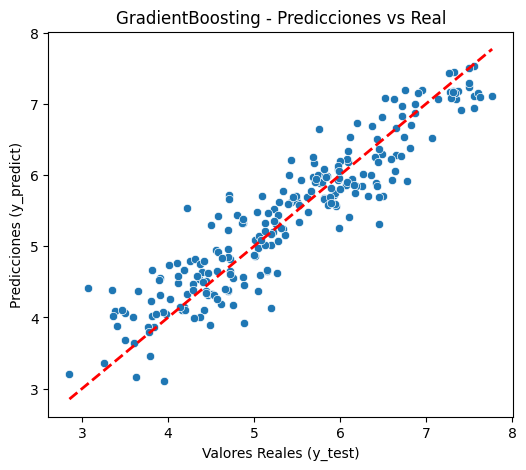

RandomForest
MSE:  0.16268951184890357
R2:  0.8713825311337908
MAE:  0.3136936150661312


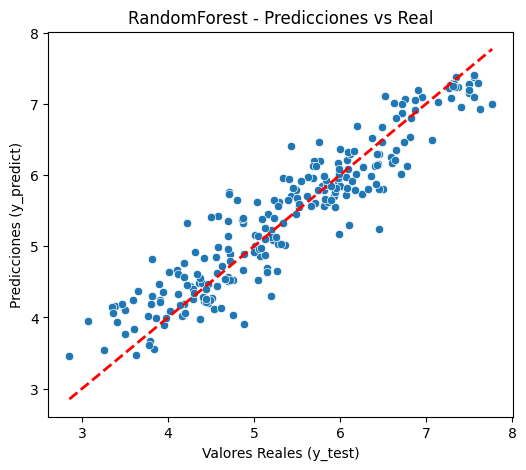

XGBoost
MSE:  0.18284263024155054
R2:  0.8554500776648135
MAE:  0.325947180516669


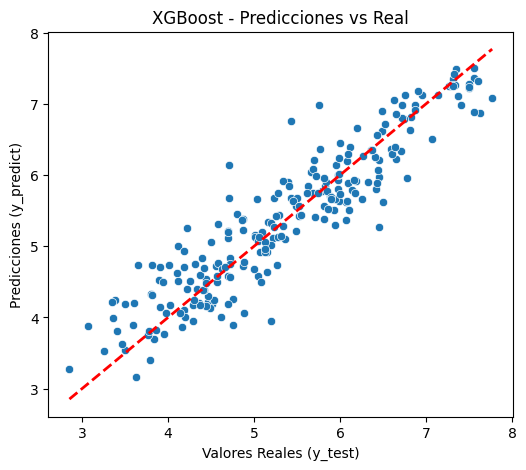

CatBoost
MSE:  0.14285833201822273
R2:  0.8870604695913213
MAE:  0.29602843513756605


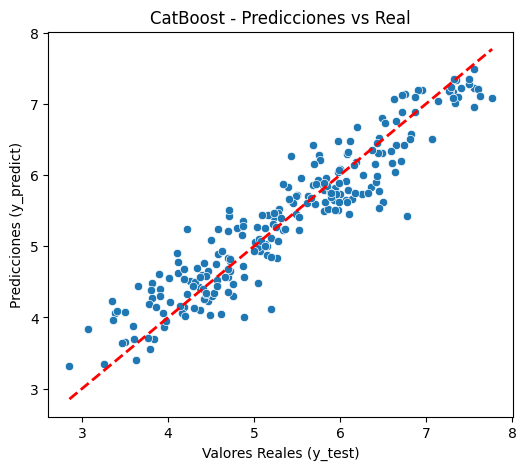

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 547, number of used features: 15
[LightGBM] [Info] Start training from score 5.378367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

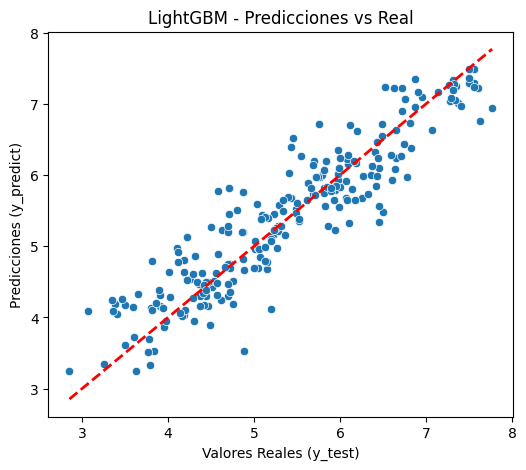

LinearRegression
MSE:  0.21775935575419614
R2:  0.8278459573653836
MAE:  0.3669260248119491


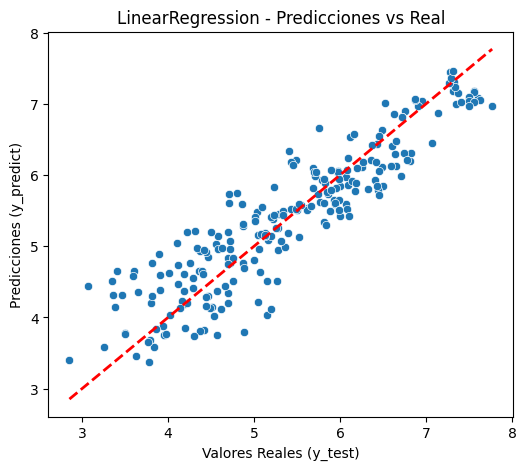

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

estimators = {
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'LinearRegression': LinearRegression()
    # añade otros modelos si quieres
}

for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    
    print("="*64)
    print(name)
    print("MSE: ", mean_squared_error(y_test, predictions))
    print("R2: ", r2_score(y_test, predictions))
    print("MAE: ", mean_absolute_error(y_test, predictions))
    
    # Crear DataFrame para graficar
    df_output = pd.DataFrame({'y_test': y_test, 'y_predict': predictions.flatten()})
    
    plt.figure(figsize=(6,5))
    plt.title(f"{name} - Predicciones vs Real")
    plt.xlabel("Valores Reales (y_test)")
    plt.ylabel("Predicciones (y_predict)")
    sns.scatterplot(x='y_test', y='y_predict', data=df_output)
    plt.plot([df_output.y_test.min(), df_output.y_test.max()], 
             [df_output.y_test.min(), df_output.y_test.max()], 
             color='red', lw=2, linestyle='--')  # línea diagonal ideal
    plt.show()


### Datos reales vs datos simulados 

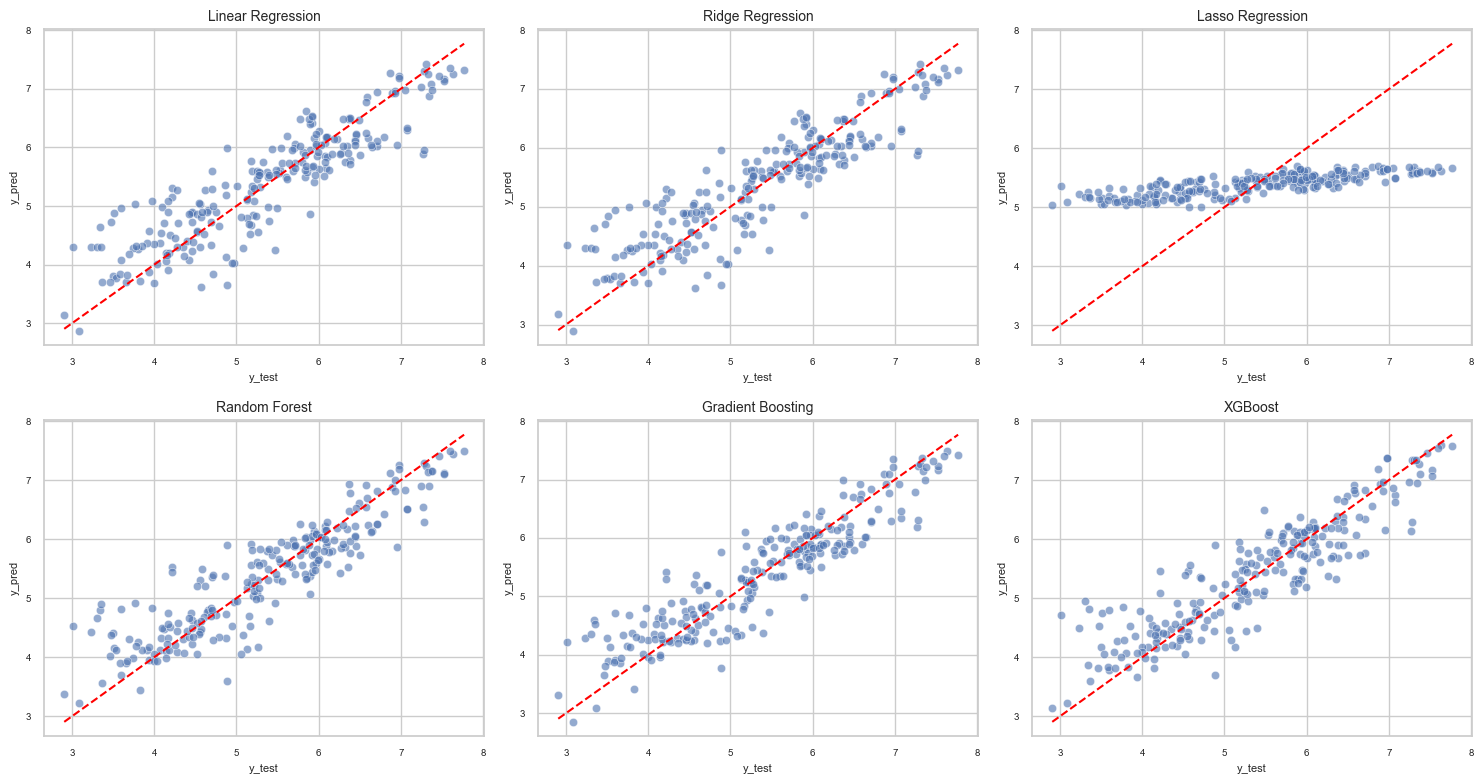

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Aplanamos para iterar fácilmente

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(name, fontsize=10)
    ax.set_xlabel("y_test", fontsize=8)
    ax.set_ylabel("y_pred", fontsize=8)
    ax.tick_params(labelsize=7)

# Si hay más subplots de los que necesitamos, los apagamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Guardar el modelo

In [10]:
import pickle

# Entrenar XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Guardar el modelo
with open('../models/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)